(VALVECSINGALGSVD)=

# 2.4 Valores, vectores singulares y algoritmos para calcular la SVD

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker y `<versión imagen de docker>` por la versión más actualizada que se presenta en la documentación.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:<versión imagen de docker>`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:<versión imagen de docker>` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Aprenderá algunas definiciones y resultados de los valores y vectores singulares.

* Comprenderá la relación entre la descomposición de valores singulares de una matriz y las componentes principales desde una perspectiva algebraica. Así también tendrá definiciones utilizadas en Estadística para este último tema.

* Aprenderá la definición de matriz definida y semidefinida positiva.

* Se proporcionará una lista de algoritmos para calcular la descomposición en valores singulares.

```

En esta nota **asumimos** que $A \in \mathbb{R}^{m \times n}$.

## Valor singular

```{admonition} Definición

El número $\sigma$ se denomina valor *singular* de $A$ si $\sigma = \sqrt{\lambda_{A^TA}} = \sqrt{\lambda_{AA^T}}$ donde: $\lambda_{A^TA}$ y $\lambda_{AA^T}$ es eigenvalor de $A^TA$ y $AA^T$ respectivamente.

```

```{admonition} Observación
:class: tip

La definición se realiza sobre $A^TA$ o $AA^T$ pues éstas matrices tienen el mismo espectro y además sus eigenvalores son reales y no negativos por lo que $\sigma \in \mathbb{R}$ y de hecho $\sigma \geq 0$ (la raíz cuadrada se calcula para un eigenvalor no negativo).

```

## Vector singular izquierdo, vector singular derecho

```{admonition} Definición

Asociado con cada valor singular $\sigma$ existen vectores singulares $u,v$ que cumplen con la igualdad: 

$$Av = \sigma u .$$ 

Al vector $u$ se le nombra **vector singular izquierdo** y al vector $v$ se le nombra **vector singular derecho**.
```

## Descomposición en valores singulares (SVD)

Si $A \in \mathbb{R}^{mxn}$ entonces existen $U \in \mathbb{R}^{mxm}, V \in \mathbb{R}^{nxn}$ **ortogonales** tales que: $A = U\Sigma V^T$ con $\Sigma = diag(\sigma_1, \sigma_2, \dots, \sigma_p) \in \mathbb{R}^{mxn}$, $p = \min\{m,n\}$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_p \geq 0$.

Por ejemplo para un caso $m < n$:

$$
\left [
\begin{array}{ccc}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
u_{11} & u_{12}\\
u_{21} & u_{22}
\end{array}
\right ]
\left [
\begin{array}{ccc}
\sigma_1 & 0 & 0\\
0 & \sigma_2 & 0
\end{array}
\right ]
\left [
\begin{array}{ccc}
v_{11} & v_{21} & v_{31}\\
v_{12} & v_{22} & v_{32}\\
v_{13} & v_{23} & v_{33}
\end{array}
\right ]
$$

y para un caso $m > n$:

$$
\left [
\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
a_{31} & a_{32}
\end{array}
\right ]
=
\left [
\begin{array}{ccc}
u_{11} & u_{12} & u_{13}\\
u_{21} & u_{22} & u_{23}\\
u_{31} & u_{32} & u_{33}
\end{array}
\right ]
\left [
\begin{array}{cc}
\sigma_1 & 0\\
0 & \sigma_2\\
0 & 0
\end{array}
\right ]
\left [
\begin{array}{cc}
v_{11} & v_{21}\\
v_{12} & v_{22}\\
\end{array}
\right ]
$$

```{admonition} Definición

Las columnas de $U$ nombramos **vectores singulares izquierdos de $A$** y las columnas de $V$ nombramos **vectores singulares derechos de $A$** en $A = U \Sigma V^T$.

```

```{admonition} Comentarios

* La notación $\sigma_1$ hace referencia al valor singular más grande de A, $\sigma_2$ al segundo valor singular más grande de A y así sucesivamente.

* Para cualquier $A \in \mathbb{R}^{m \times n}$ se tiene $A = U \Sigma V^T$. Si $b = Ax = (U \Sigma V^T) x$ entonces:

$$\tilde{b} = U^Tb = U^T  (Ax) = U^T (U \Sigma V^T) x = \Sigma V^Tx = \Sigma \tilde{x}.$$

Lo anterior indica que el producto matricial $Ax$ para cualquier matriz $A$ es equivalente a multiplicar una matriz diagonal por un vector denotado como $\tilde{x}$ que contiene los coeficientes de la combinación lineal de las columnas de $V$ para el vector $x$ . El resultado de tal multiplicación es un vector denotado como $\tilde{b}$ que contiene los coeficientes de la combinación lineal de las columnas de $U$ para el vector $b$. En resúmen, la multiplicación $Ax$ es equivalente a la multiplicación por una matriz diagonal $\Sigma \tilde{x}$ salvo dos cambios de bases, ver [Change of basis](https://en.wikipedia.org/wiki/Change_of_basis), la base de los vectores singulares derechos (columnas de $V$) y la base de los vectores singulares izquierdos (columnas de $U$).


* La SVD que se definió arriba es nombrada *SVD full*, hay otras formas como la **truncada** en la que $U \in \mathbb{R}^{m \times k}$, $V \in \mathbb{R}^{nxk}$ y $\Sigma \in \mathbb{R}^{k \times k}$ con $k \leq r$, **compacta** donde $k=r$ y la *thin* en la que $k=p$:


<img src="https://dl.dropboxusercontent.com/s/8dq0jiw5em93k1j/svd_thin.png?dl=0" heigth="700" width="700">


donde: $r = rank(A)$.

Ver [reduced SVDs](https://en.wikipedia.org/wiki/Singular_value_decomposition#Reduced_SVDs).

```

## Algunas propiedades

Existen diferentes propiedades de los valores y vectores singulares, aquí se enlistan algunas:

* Si $rank(A) = r$ entonces $r \leq p$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > \sigma_{r+1} = \sigma_{r+2} = \dots = \sigma_p =  0$.

* Si $rank(A) = r$ entonces $A = \displaystyle \sum_{i=0}^r \sigma_i u_i v_i^T$ con $u_i$ $i$-ésima columna de U y $v_i$ $i$-ésima columna de V.

* Geométricamente los valores singulares de una matriz $A \in \mathbb{R}^{mxn}$ son las longitudes de los semiejes del hiperelipsoide $E$ definido por $E = \{Ax : ||x||_2 \leq 1\}$ y los vectores $u_i$ son direcciones de estos semiejes; los vectores $vi$'s tienen norma igual a $1$ por lo que se encuentran en una circunferencia de radio igual a $1$ y como $Av_i = \sigma u_i$ entonces $A$ mapea los vectores $v_i$'s a los semiejes $u_i$'s respectivamente:


<img src="https://dl.dropboxusercontent.com/s/1yqoe4qibyyej53/svd_2.jpg?dl=0" heigth="700" width="700">

* La SVD da bases ortogonales para los $4$ espacios fundamentales de una matriz: espacio columna, espacio nulo izquierdo, espacio nulo y espacio renglón:

<img src="https://dl.dropboxusercontent.com/s/uo9s9f0nqi43s6d/svd_four_spaces_of_matrix.png?dl=0" heigth="600" width="600">


* Si $t < r$ y $r=rank(A)$ entonces $A_t =  \displaystyle \sum_{i=0}^t \sigma_i u_i v_i^T$ (SVD truncada) es una matriz de entre todas las matrices con $rank$ igual a t, que es más *cercana* a A. La cercanía se mide con la norma **matricial** Euclidiana y de Frobenius, en el caso de Frobenius es la única matriz que cumple lo anterior.

## Algunas aplicaciones

Algunas de las aplicaciones de la SVD se encuentran:

* Procesamiento de imágenes y señales.
* Sistemas de recomendación (Netflix).
* Mínimos cuadrados.
* Componentes principales.
* Reconstrucción de imágenes.

### Ejemplo: componentes principales

Considérese $X \in \mathbb{R}^{m \times n}$ cuyas columnas tienen una observación de un **vector aleatorio** (tenemos $n$ vectores aleatorios de mediciones) y $X = U \Sigma V^T$ la descomposición en valores singulares de $X$, entonces los vectores **singulares derechos** $v_i$ (columnas de la matriz $V$) son nombrados **ejes o direcciones principales** de $X$ y el vector $z_1 = X v_1 = \sigma_1 u_1$ con $u_1$ vector **singular izquierdo** (primera columna de la matriz $U$) tiene **varianza muestral**:

$$\text{var}(z_1) = \text{var}(X v_1)= \text{var}(\sigma_1 u_1) = \sigma_1^2 \text{var}(u_1) = \sigma_1^2 \left [ \frac{1}{m} \displaystyle \sum_{i=1}^m (u_1(i) - \bar{u}_1)^2 \right ]$$

donde: $u_1(i)$ es la $i$-ésima componente de $u_1$ y $\sigma_1$ es el máximo valor singular de $X$ también denotado como $\sigma_{\text{max}}$.

```{admonition} Comentarios

Si la media de cada columna de $X$ es cero, $X$ se nombra **centrada**, entonces:

* $z_1$ tiene la **máxima varianza muestral** entre todas las combinaciones lineales de las columnas de $X$ pues:

$$\text{var}(z_1) = \frac{\sigma_1^2}{m} \displaystyle \sum_{i=1}^m u_1(i)^2 = \frac{\sigma_1^2}{m} ||u_1||_2^2 = \frac{\sigma_1^2}{m}.$$

* $z_1$ es la **primera componente principal** y el vector $u_1 = \frac{1}{\sigma_1}z_1 = \frac{1}{\sigma_1}Xv_1$ se le nombra **primera componente principal normalizada**. El vector $v_1$ es la **primera dirección principal** de $X$ o también nombrada ***loading***. 

```

Algunas definiciones utilizadas en Estadística se encuentran las siguientes.

```{admonition} Definición

La **matriz de correlaciones entre cada componente principal normalizada $u$'s y cada columna de $X$** es:

$$ C = \left (\frac{\sigma_1}{\sqrt{m}} v_1 \quad \frac{\sigma_2}{\sqrt{m}} v_2 \cdots \quad \frac{\sigma_n}{\sqrt{m}} v_n \right) \in \mathbb{R}^{n \times n}$$

pues si $x_1$ es la primer columna de $X$ entonces:

$$
\begin{eqnarray}
\text{cov}(x_1,u_1) = \text{cov} \left ( \displaystyle \sum_{k=1}^n \sigma_k v_k(1) u_k, u_1 \right ) &=& \displaystyle \sum_{k=1}^n \text{cov} ( \sigma_k v_k(1) u_k, u_1 ) \nonumber \\
&=& \displaystyle \sum_{k=1}^n \sigma_k v_k(1) \text{cov} (u_k, u_1) \nonumber \\
&=& \sigma_1 v_1(1) \text{var}(u_1) \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m} \sum_{i=1}^m u_1(i)^2 \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m} \nonumber
\end{eqnarray}
$$


Y como $\text{cor}(x_1,u_1) = \frac{\text{cov}(x_1,u_1)}{\sqrt{\text{var}(x_1)} \sqrt{\text{var}(u_1)}}$ se tiene:

$$\text{cor}(x_1,u_1) = \frac{\frac{\sigma_1 v_1(1)}{m}}{1 \cdot \sqrt{\frac{1}{m}}}  = \frac{\sigma_1 v_1(1)}{\sqrt{m}} $$
```

```{admonition} Definición

El cociente de **varianza explicada** para cada componente es el número:

$$\frac{\sigma_i^2}{\displaystyle \sum_{i=1}^p \sigma_i^2}$$

con $p = \min(m,n)$.


```

```{admonition} Observación
:class: tip

la matriz $\frac{1}{m}X^TX$ es la matriz de **varianzas y covarianzas muestral** la cual **siempre** es una matriz simétrica positiva semidefinida (aún si la $X$ no es centrada). Si $X$ además de ser centrada cumple que la varianza de cada una de sus columnas es $1$, $X$ se nombra **estandarizada**. La matriz $\frac{1}{m}X^TX$ en este caso es la matriz de **correlaciones muestral**.

```

(MATRIZSDPOSITIVA)=

```{admonition} Definición

Una matriz $A$ es semidefinida positiva si $x^TAx \geq 0$ $\forall x \in \mathbb{R}^n - \{0\}$. Si se cumple de forma estricta la desigualdad entonces $A$ es **definida positiva**. Con los eigenvalores podemos caracterizar a las matrices definidas y semidefinidas positivas: $A$ es semidefinida positiva si y sólo si los eigenvalores de $T=\frac{A+A^T}{2}$ son no negativos. Es definida positiva si y sólo si los eigenvalores de $T$ son positivos. Los conjuntos de matrices que se utilizan para definir a matrices simétricas semidefinidas positivas y simétricas definidas positivas son $\mathbb{S}_{+}^n$ y $\mathbb{S}_{++}^n$ respectivamente ($\mathbb{S}$ es el conjunto de matrices simétricas).

```

In [2]:
!pip install --quiet sklearn

In [4]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
np.random.seed(2020)
mpoints=200
X = (np.random.rand(2,2)@np.random.normal(0,1,(2,mpoints))).T

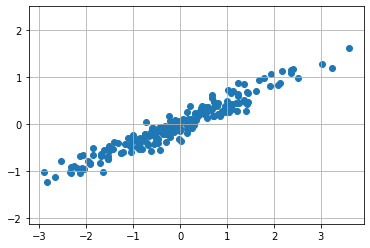

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal');

In [8]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(n_components=2, svd_solver='full')

**Direcciones o ejes principales**:

In [9]:
print(pca.components_)

[[ 0.91945871  0.39318658]
 [ 0.39318658 -0.91945871]]


**Varianza explicada por cada componente (primera posición para la primera componente):**

In [10]:
print(pca.explained_variance_ratio_)

[0.99029474 0.00970526]


**Valores singulares de la matriz $X$:**

In [11]:
pca.singular_values_

array([18.68043742,  1.84930434])

**Componentes principales con el método [transform](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) de `scikit-learn.PCA`:**

In [12]:
z = pca.transform(X)

In [13]:
z.shape

(200, 2)

**Primera componente:**

In [14]:
z1 = z[:,0]

In [15]:
z1[0:10]

array([-0.73286192, -0.10931069, -0.5294992 , -1.62049625, -0.55137898,
        0.42135363,  0.07424362, -0.29822525, -1.73357019, -0.56416428])

**Segunda componente:**

In [16]:
z2 = z[:,1]

In [17]:
z2[0:10]

array([ 0.14574216,  0.11652276,  0.12040267,  0.08249224, -0.0437718 ,
        0.03168412, -0.07123458,  0.08183026, -0.02113837, -0.31235302])

Usemos el método de [SVD](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html#numpy.linalg.svd) del paquete `numpy` para revisar lo que nos devuelve y observar que son iguales sus resultados:

Primero centramos a la $X$:

In [18]:
X_centered = X - X.mean(axis=0)

No olvidemos que el método de `numpy` nos devuelve $V^T$ y no $V$:

In [19]:
u,s,vt = np.linalg.svd(X_centered)

**Los valores singulares están dados por la diagonal de $\Sigma$:**

In [21]:
print(np.isclose(pca.singular_values_,s))

[ True  True]


**Las direcciones principales están dadas por las columnas de $V$ (salvo signos positivos o negativos):**

In [24]:
print(np.isclose(np.abs(pca.components_[0,:]),np.abs(vt.T[:,0])))

[ True  True]


In [31]:
print(np.isclose(np.abs(pca.components_[1,:]), np.abs(vt.T[:,1])))

[ True  True]


**Las componentes principales están dadas por la multiplicación matricial $XV$ (salvo signos positivos o negativos):**

In [32]:
z_manual = X_centered@(vt.T)

In [33]:
z1_manual = z_manual[:,0]

In [34]:
print(np.isclose(np.abs(z1), np.abs(z1_manual)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [35]:
z2_manual = z_manual[:,1]

In [36]:
print(np.isclose(np.abs(z2), np.abs(z2_manual)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

**También podemos hacer la multiplicación $\sigma u$ (salvo signos positivos o negativos):**

In [37]:
z1_manual_2 = s[0]*u[:,0]

In [38]:
print(np.isclose(np.abs(z1), np.abs(z1_manual_2)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [39]:
z2_manual_2 = s[1]*u[:,1]

In [40]:
print(np.isclose(np.abs(z2), np.abs(z2_manual_2)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

**La varianza explicada está dada por los valores singulares al cuadrado divididos por la suma de éstos al cuadrado:**

In [41]:
print(np.isclose(pca.explained_variance_ratio_[0], s[0]**2/np.sum(s**2)))

True


In [42]:
print(np.isclose(pca.explained_variance_ratio_[1], s[1]**2/np.sum(s**2)))

True


```{admonition} Ejercicios
:class: tip

* Muestra en la gráfica de la nube de puntos del ejemplo anterior las direcciones principales.

* Genera otra nube de puntos y realiza los pasos del ejemplo anterior (equivalencia entre métodos en los paquetes de *Python*) junto con la gráfica de las direcciones principales.

```

## Métodos numéricos para calcular SVD


```{margin} 

En *NumPy* con [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) podemos calcular la SVD de $A$, obsérvese en la ayuda  que se regresa $V^T$ y no $V$.

```


Algunos métodos para calcular la descomposición en valores singulares de una matriz son:

* Método de rotaciones de Jacobi ***one sided***, ver {ref}`rotaciones de Jacobi para matrices simétricas <ROTJACMATSIM>` en el que se utiliza el ***two sided***.

* [Bidiagonalización](https://en.wikipedia.org/wiki/Bidiagonalization). 

* [Método de la potencia](https://en.wikipedia.org/wiki/Power_iteration) en el que se utiliza el **[cociente de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_quotient)** para acelerar convergencia, ver {ref}`método de la potencia para matrices simétricas <MPOTMATSIM>` y la {ref}`iteración por el cociente de Rayleigh para matrices simétricas <ITERCRAYMATSIM>`.

* [Algoritmo QR](https://en.wikipedia.org/wiki/QR_algorithm) que se basa en la factorización QR, ver {ref}`algoritmo QR o QR iteration (versión simple) para matrices simétricas <ALGQR>`.

* Métodos de descenso aplicados a problemas de optimización. 

* Para casos particulares como una matriz $A$ *sparse* o rala (gran cantidad de ceros) se utilizan algoritmos como [**Lanczos Golub Kahan bidiagonalization**](http://www.netlib.org/utk/people/JackDongarra/etemplates/node198.html) que forma parte de una amplia clases de métodos nombrados [**Krylov subspace methods**](https://en.wikipedia.org/wiki/Krylov_subspace) y el algoritmo de [**tridiagonalización Lanczos**](https://en.wikipedia.org/wiki/Lanczos_algorithm).

## Método de rotaciones de Jacobi *one sided*

En este método se utilizan rotaciones de Jacobi, ver {ref}`transformaciones de rotación <TROT>`, para construir a la matriz ortogonal $V \in \mathbb{R}^{n \times n}$ y llegar a una matriz $W$: 

$$AV \rightarrow W \in  \mathbb{R}^{m \times n}$$

```{admonition} Comentario

Las normas Euclidianas de las columnas de $W$ construyen a los valores singulares $\sigma_i \forall i=1,\dots,r$:

$$W = [U_1 \quad 0]\left[ \begin{array}{cc}
\Sigma & 0\\
0 & 0
\end{array}
\right]$$

con $r=rank(A)$, $U_1 \in \mathbb{R}^{m \times r}$ matriz con columnas ortonormales: $U_1^TU_1=I_r$ y $\Sigma = diag(\sigma_1,\dots, \sigma_r)$ matriz diagonal.


Esta SVD es una forma compacta.
```

```{margin}

Los criterios de paro en un método iterativo ayudan a contestar preguntas del tipo ¿hemos resuelto el problema de forma aproximada?

```

### Algoritmo: Método de rotaciones de Jacobi *one sided*

Se denota $A_k=[a_1^{(k)} a_2^{(k)} \cdots a_n^{(k)}]$ con cada $a_i^{(k)}$ como $i$-ésima columna de $A$.

> **Dados** $A \in \mathbb{R}^{m \times n}$ y $tol >0$ **definir** $A_0 = A$, $V_0 = I_n$.
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>> 1. Elegir un par de índices $(idx1,idx2)$ con alguna de las metodologías descritas en el bloque siguiente de comentarios.
>>
>> 2. Revisar si las columnas $a_i^{(k)}, a_j^{(k)}$ son ortogonales (el chequeo se describe en los comentarios). 
>>
>> 3. Si son ortogonales se incrementa por uno la variable $num\text{_}columnas\text{_}ortogonales$. 
>>
>> 4. Si no son ortogonales: 
>>>
>>>Calcular $\left[ \begin{array}{cc} a & d\\ d & b \end{array} \right]$ la submatriz $(i,j)$ de $A_k^{T}A_k$ donde: $a = ||a_i^{(k)}||_2^2, b=||a_j^{(k)}||_2^2, d=a_i^{T(k)}a_j^{(k)}$. 
>>>
>>>Calcular las entradas $c: = \cos(\theta), s:=\sin(\theta)$ de la matriz de rotación $J_k$ que diagonaliza $\left[ \begin{array}{cc} a & d\\ d & b \end{array} \right]$.
>>>
>>>Actualizar las columnas $i,j$ de $A_k$ con la multiplicación $A_k J_k$ para obtener $A_{k+1}$, esto es: $A_{k+1} = A_k J_k$.
>>>
>>>Actualizar las columnas $i,j$ de $V_k$ con la multiplicación $V_k J_k$ para obtener $V_{k+1}$, esto es: $V_{k+1} = V_k J_k$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $num\text{_}columnas\text{_}ortogonales$ y $maxsweeps$.



````{admonition} Comentarios

* En el método se hace mención de **metodologías** que ayudan a elegir los índices del renglón y columna del par de entradas de $A$ que serán eliminadas (hacer cercanas a cero). Algunas de éstas son:

    * Elegir $(idx1,idx2)$ tales que $|a_{idx1,idx2}| = \displaystyle \max_{i \neq j}|a_{ij}|$.

    * **Ordenamiento cíclico por renglones:** elegir $(idx1, idx2)$ en el conjunto $(1,2),(1,3),\dots,(1,n),(2,3),(2,4)\dots,(n-1,n)$.

* En matrices mayores a dos dimensiones el método de rotaciones de Jacobi *one sided* requiere **ortogonalización repetida** (volver a hacer columnas ortogonales) del par de columnas de $A$ seleccionadas de iteraciones previas pues en cada iteración vuelven a ser no ortogonales en general. 

     
* ¿Cómo revisar si las columnas  $i,j$ de $A_k$ son ortogonales?  si se cumple que

$$\frac{|a_i^{T (k)}a_j^{(k)}|}{||a_i^{(k)}||_2||a_j^{(k)}||_2} < tol$$

con $tol$ una cantidad pequeña y positiva (comúnmente menor o igual a $10^{-8}$) entonces son ortogonales las columnas $a_i^{(k)}, a_j^{(k)}$ de $A_k$.

* Las entradas de la matriz $J_k$ son: $\tau = \frac{b-a}{2d}, t^*=\frac{signo(\tau)}{|\tau| + \sqrt{1+\tau^2}}, c = \frac{1}{\sqrt{1+t^{*2}}}, s = ct^*$.   

* Para actualizar las columnas $i,j$ de $A_k$ de forma eficiente utilizar: para $\ell$ de $1$ a $n$:
    
    * $temp = A^{(k)}_{\ell i}$

    * $A_{\ell i}^{(k)} = c*temp - s*A_{\ell j}^{(k)}$

    * $A_{\ell j}^{(k)} = s*temp + c*A_{\ell j}^{(k)}$
    
con $A_{\ell i}^{(k)}$ entrada $\ell, i$ de $A_k$.
        
* Para actualizar las columnas $i,j$ de $V_k$ de forma eficiente utilizar: para $\ell$ de $1$ a $n$:
    
    * $temp = V_{\ell i}^{(k)}$

    * $V_{\ell i}^{(k)} = c*temp - s*V_{\ell j}^{(k)}$

    * $V_{\ell j}^{(k)} = s*temp + c*V_{\ell j}^{(k)}$
    
con $V_{\ell i}^{(k)}$ entrada $\ell, i$ de $V_k$.    
    
* El método de rotaciones de Jacobi para matrices simétricas utiliza como criterios de paro:

    * La cantidad $num\text{_}columnas\text{_}ortogonales$.
    
    * Número máximo de *sweeps*. Un *sweep* consiste de como máximo $\frac{n(n-1)}{2}$ rotaciones (pues depende de cuántas columnas son o no ortogonales) y en cada *sweep* se ortogonalizan $2$ columnas. El criterio de paro es de la forma:

```
while num_columnas_ortogonales != n(n-1)/2 && sweeps < max_sweeps
```

con `sweeps` contador de los *sweeps*.
    

* Al finalizar el método, los valores singulares calculados son las normas Euclidianas de cada columna de $A_k$ y las columnas normalizadas de $A_k$ son las columnas de $U$. 

* En esencia el método de rotaciones de Jacobi *one sided* con ordenamiento cíclico por renglones está realizando lo siguiente por ejemplo para una matriz de $4\times 4$:

En el primer *sweep* se trabajan las columnas $1$ y $2$ para el par de índices $(1,2)$:

1. Se revisa si las columnas son ortogonales, si lo son se incrementa en un contador.
2. Si no son ortogonales entonces se ortogonalizan con el producto $AJ$ y se acumula las rotaciones con el producto $VJ$.

Se repiten los pasos $1$ y $2$ para las columnas en los índices $(1,3), (1,4), (2,3), (2,4), (3,4)$.

En el segundo *sweep* se repite lo del primer *sweep*

Hasta convergencia.

Con el producto $AJ$ se converge a una matriz $W$ con la que se obtendrán $U, \Sigma$ y con el producto $VJ$ se converge a la matriz $V$ de la SVD.

(En la descripción anterior se omite el subíndice $k$ por facilidad).

````

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión**

1)¿Cómo se podría calcular el rank de una matriz si se han calculado previamente sus valores singulares?

2)Verdadero o falso:

a. Las columnas de la matriz V en la SVD de una matriz A, son eigenvectores de la matriz AA^T.

b. Si el rank de una matriz es r, entonces las columnas r+1 a m de la matriz U en la SVD de la matriz A de tamaño mxn nos dan una base del espacio nulo izquierdo de A.

c. La norma 2 de una matriz A es el mínimo valor singular de A.

3)¿Cuál es la mejor aproximación a una matriz A bajo la norma de Frobenius que se puede obtener sobre el espacio de matrices de rank igual a t ?

4)Menciona características y diferencias que tiene la *eigen decomposition* y la SVD de una matriz A (suponemos existe una *eigen decomposition*).

5)Menciona métodos numéricos para calcular la SVD de una matriz.

6)Menciona aplicaciones de la SVD de una matriz.

**Referencias**

1. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

2.  G. H. Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013. 

3. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.